In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

0    549
1    342
Name: Survived, dtype: int64


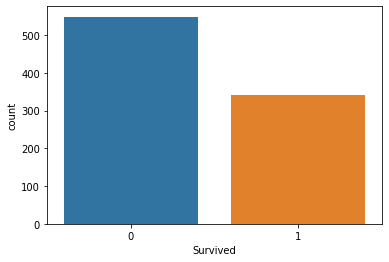

In [7]:
print(df['Survived'].value_counts())
sns.countplot(x=df['Survived'])

In [8]:
df['Sex'] = df['Sex'].astype('category')
print(df['Sex'])

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: category
Categories (2, object): [female, male]


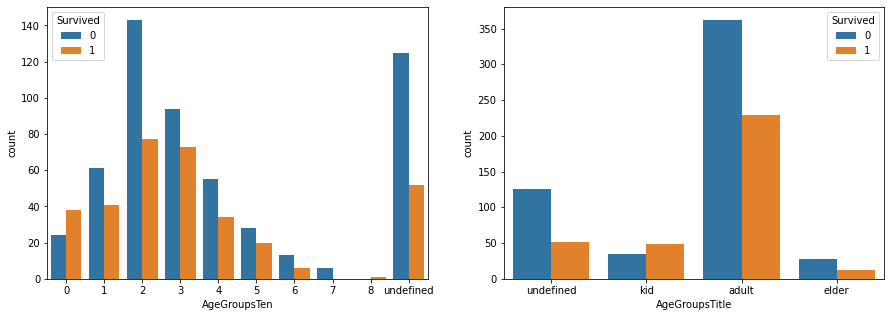

In [9]:
def group_age_by_ten(row):
    if np.isnan(row.Age):
        return 'undefined'
    return int(row.Age/10)

df['AgeGroupsTen'] = df.apply(group_age_by_ten, axis=1)
test['AgeGroupsTen'] = test.apply(group_age_by_ten, axis=1)
df['AgeGroupsTen'] = df['AgeGroupsTen'].astype('category')
test['AgeGroupsTen'] = test['AgeGroupsTen'].astype('category')

def group_age_by_title (row):
    if row.Age < 16:
        return 1
    if 16 <= row.Age <= 55:
        return 2
    if row.Age > 55:
        return 3
    return 0

df['AgeGroupsTitle'] = df.apply(group_age_by_title, axis=1)
test['AgeGroupsTitle'] = test.apply(group_age_by_title, axis=1)
df['AgeGroupsTitle'] = df['AgeGroupsTitle'].astype('category').cat.rename_categories(['undefined', 'kid', 'adult', 'elder'])
test['AgeGroupsTitle'] = test['AgeGroupsTitle'].astype('category').cat.rename_categories(['undefined', 'kid', 'adult', 'elder'])

fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='AgeGroupsTen',  hue='Survived',data=df, ax = axes[0])
sns.countplot(x='AgeGroupsTitle',hue='Survived', data=df, ax = axes[1])

In [10]:
#dropping ticket, no valuable data found on it
df = df.drop('Ticket', axis=1)
test = test.drop('Ticket', axis=1)

In [11]:
df['Fare'] = (df['Fare']/10).astype(int)
test['Fare'] = (test['Fare']/10).astype(int)

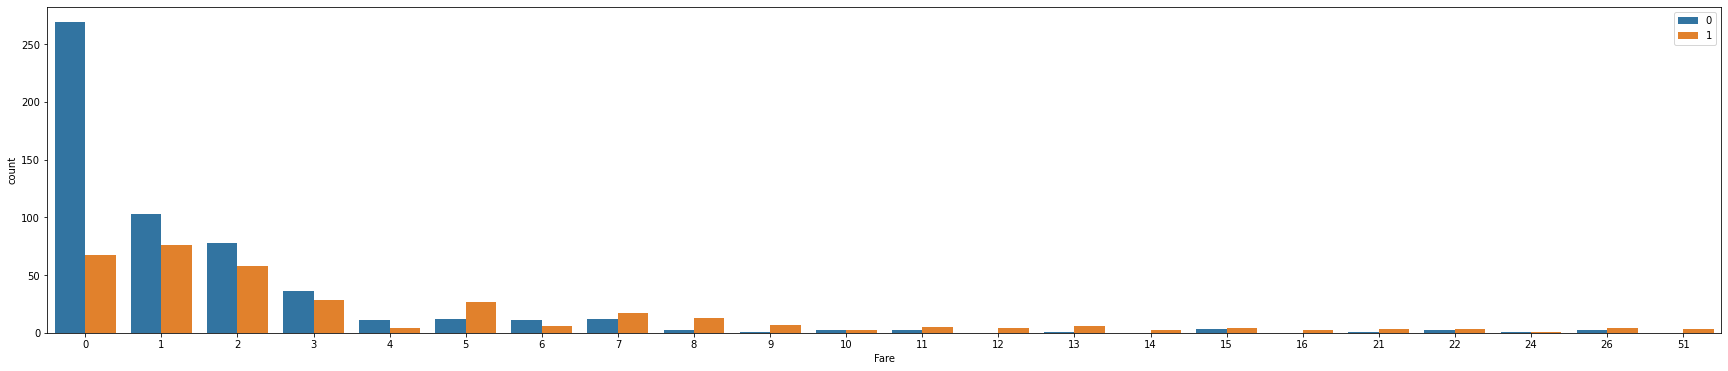

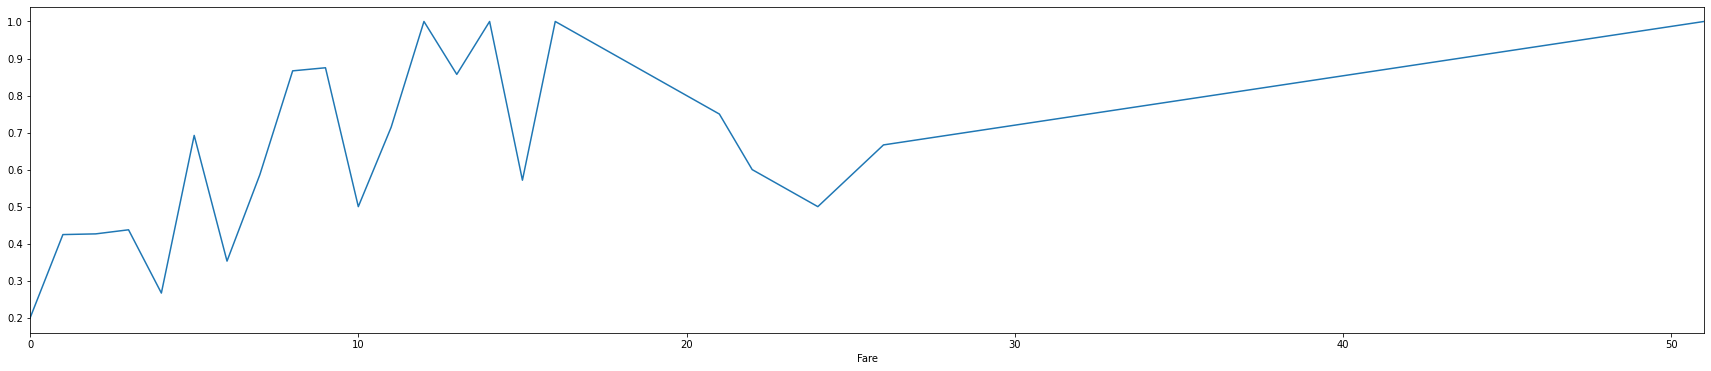

In [12]:
plt.figure(figsize=(30,6))
sns.countplot(x='Fare', hue='Survived', data=df)
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(30,6))
df.groupby('Fare').mean()['Survived'].plot()
plt.show()

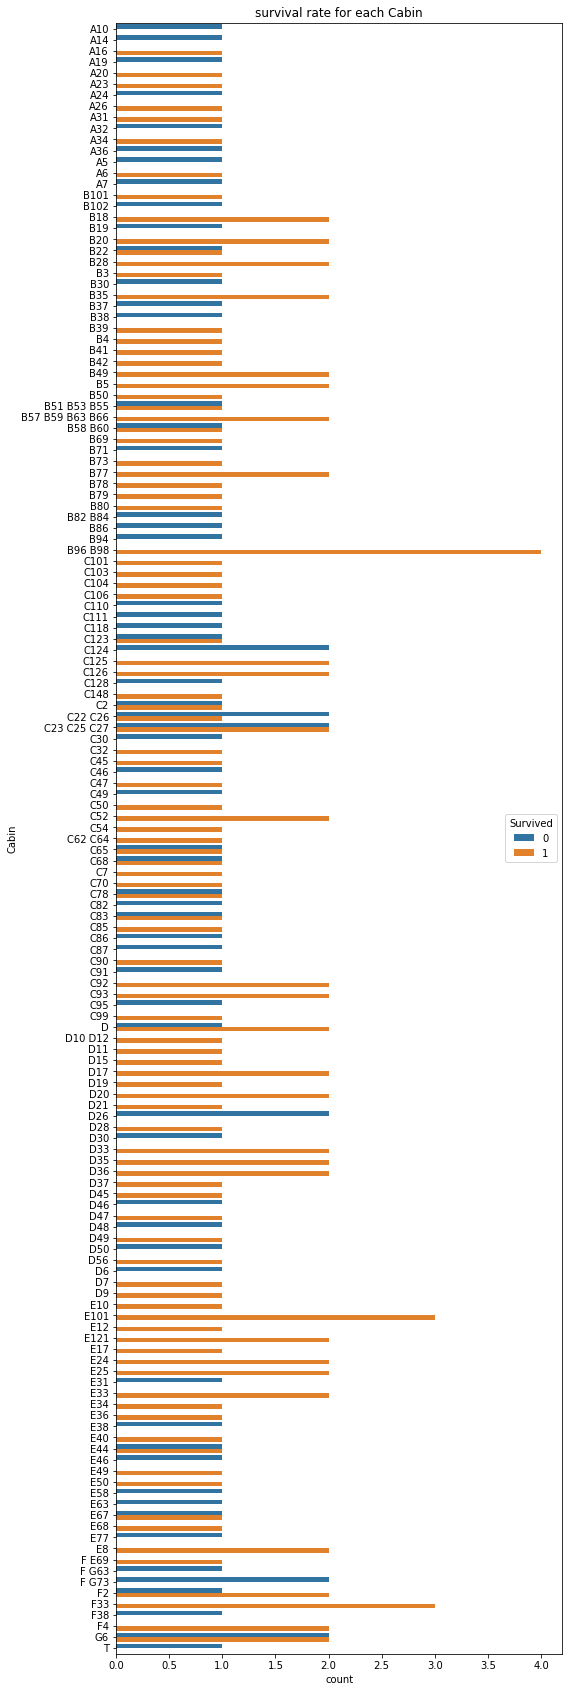

In [13]:
plt.figure(figsize=(8,30))
plt.title("survival rate for each Cabin")
sns.countplot(y='Cabin', hue='Survived', data=df.sort_values('Cabin'), orient='h')

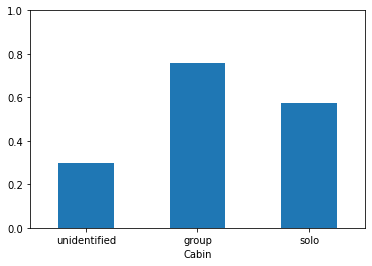

In [14]:
def group_cabin(row):
    if pd.isna(row.Cabin):
        return 0
    if df['Cabin'].value_counts()[row.Cabin] > 1:
        return 1
    return 2
def group_cabin_test(row):
    if pd.isna(row.Cabin):
        return 0
    if test['Cabin'].value_counts()[row.Cabin] > 1:
        return 1
    return 2

df['Cabin'] = df.apply(group_cabin, axis=1)
test['Cabin'] = test.apply(group_cabin_test, axis=1)
df['Cabin'] = df['Cabin'].astype('category').cat.rename_categories(['unidentified', 'group', 'solo'])
test['Cabin'] = test['Cabin'].astype('category').cat.rename_categories(['unidentified', 'group', 'solo'])

g = df.groupby('Cabin').mean()['Survived'].plot.bar()
g.set_xticklabels(g.get_xticklabels(), rotation=0)
plt.ylim(top=1)
plt.show()

In [15]:
print(df['Embarked'].value_counts())
print('Empties before filling: ', df['Embarked'].isna().sum())
df['Embarked'].fillna('S', inplace=True)
test['Embarked'].fillna('S', inplace=True)
print('Empities after filling: ', df['Embarked'].isna().sum())
df['Embarked'] = df['Embarked'].astype('category')
test['Embarked'] = test['Embarked'].astype('category')

S    644
C    168
Q     77
Name: Embarked, dtype: int64
Empties before filling:  2
Empities after filling:  0


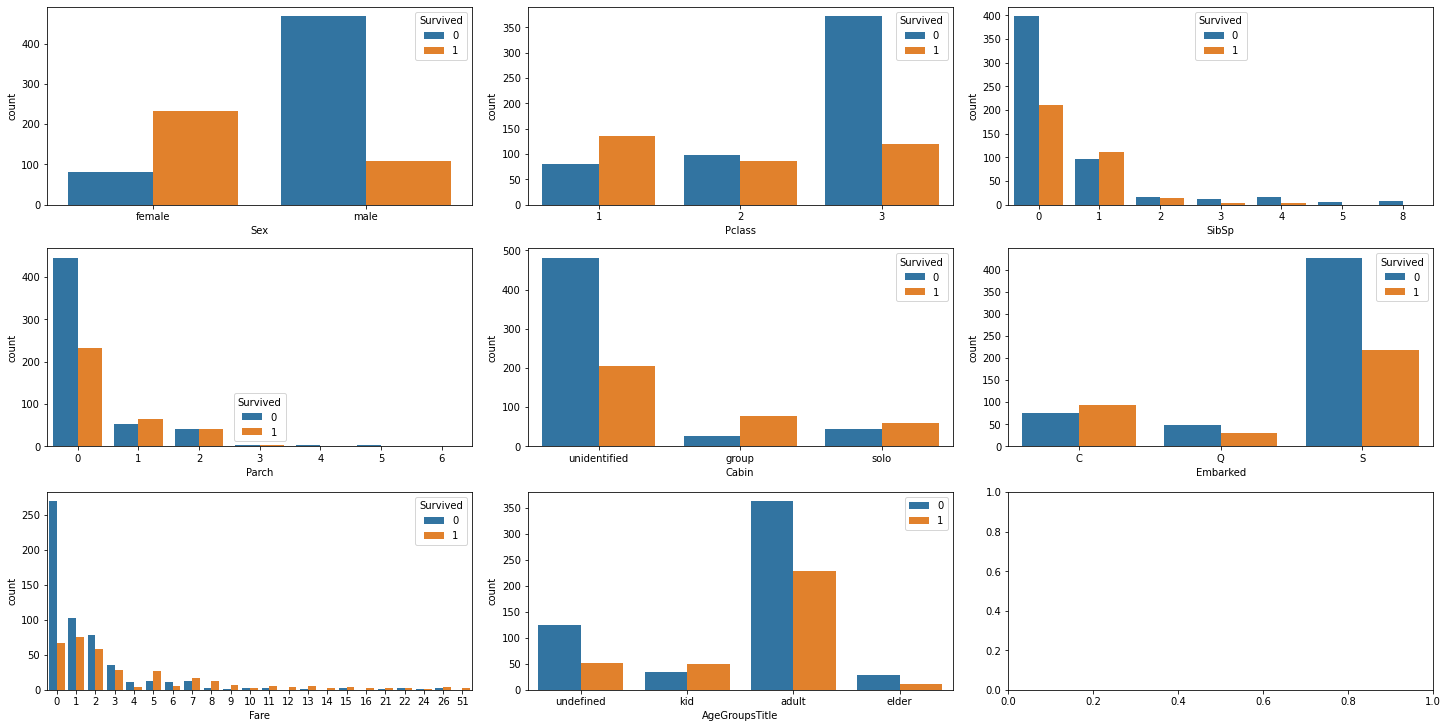

In [16]:
columns = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Cabin', 'Embarked', 'Fare', 'AgeGroupsTitle']

fig, axes = plt.subplots(3,3,constrained_layout=True, figsize=(20,10))

for i, col in enumerate(columns):
    if i == 8:
        break
    sns.countplot(x = df[col], hue=df['Survived'], ax = axes[int(i/3), int(i%3)])
axes[int(i/3), int(i%3)].legend(loc='upper right')

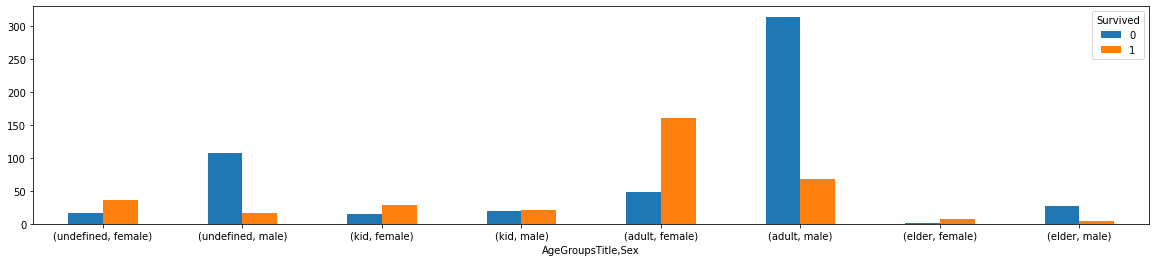

In [17]:
df.groupby(['AgeGroupsTitle', 'Sex', 'Survived'])['PassengerId'].count().unstack('Survived').plot(kind='bar', rot=0, figsize=(20,4))

Text(0.5, 0, 'Fare (10$)')

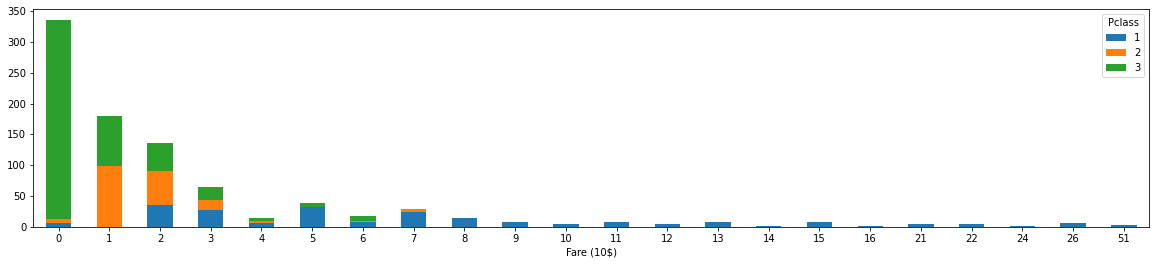

In [18]:
df.groupby(['Fare', 'Pclass'])['Fare'].count().unstack('Pclass').plot(kind='bar', rot=0, stacked=True, figsize=(20,4)).set_xlabel('Fare (10$)')

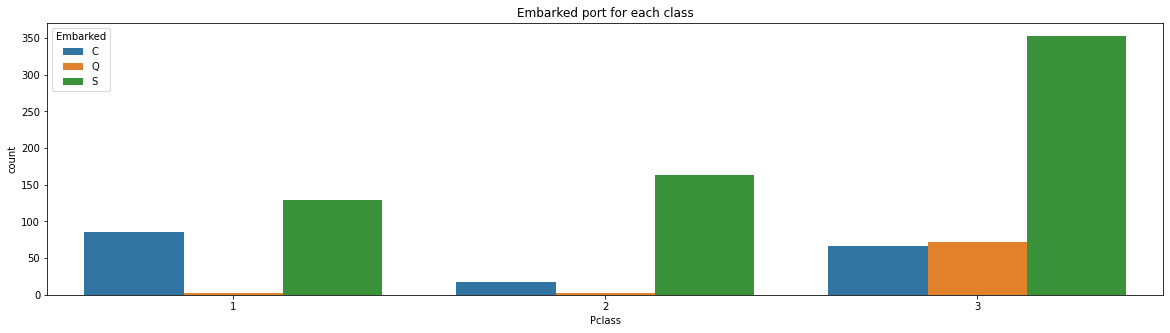

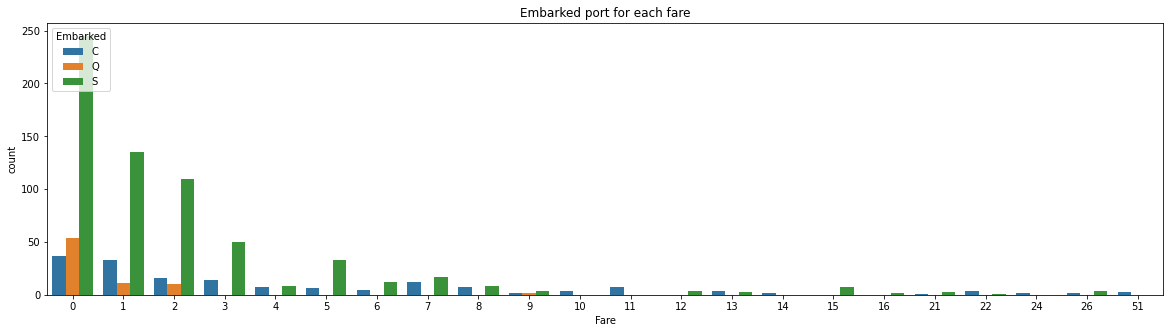

In [19]:
plt.figure(figsize=(20,5))
plt.title('Embarked port for each class')
sns.countplot(x='Pclass', hue='Embarked', data=df)
plt.figure(figsize=(20,5))
plt.title('Embarked port for each fare')
sns.countplot(x='Fare', hue='Embarked', data=df)

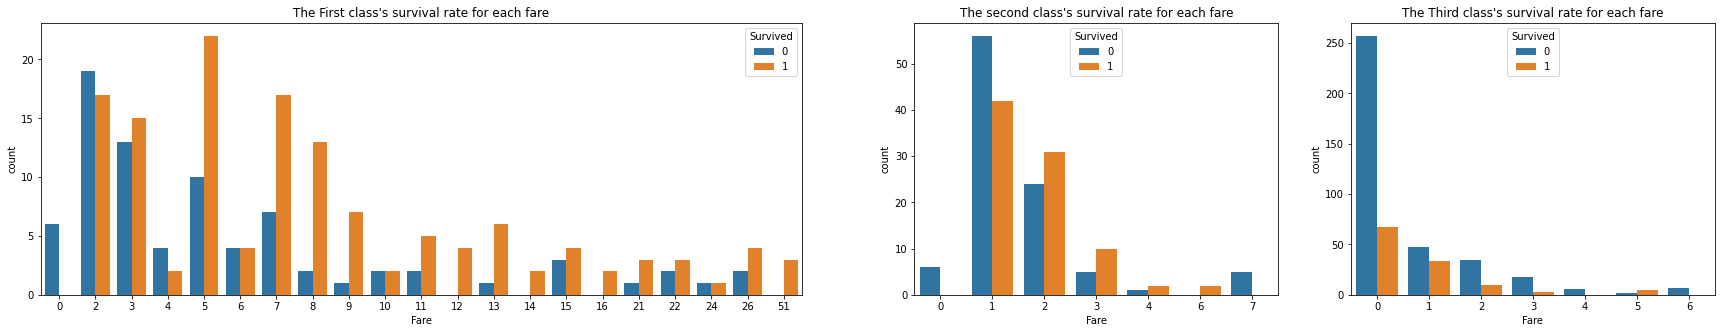

In [20]:
fig, axes = plt.subplots(1,4, figsize=(30,5))
big_ax = fig.add_subplot(1,2,1)
fig.delaxes(axes[0])
fig.delaxes(axes[1])
big_ax.set_title("The First class's survival rate for each fare")
sns.countplot(x = 'Fare', hue='Survived', data=df[df['Pclass'] == 1], ax=big_ax)
axes[2].set_title("The second class's survival rate for each fare")
sns.countplot(x = 'Fare', hue='Survived', data=df[df['Pclass'] == 2], ax=axes[2])
axes[3].set_title("The Third class's survival rate for each fare")
sns.countplot(x = 'Fare', hue='Survived', data=df[df['Pclass'] == 3], ax=axes[3])


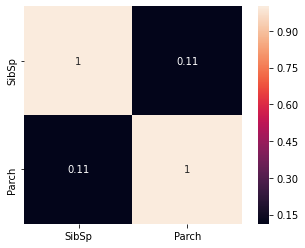

In [21]:
df2 = df[(df['SibSp'] > 0) | (df['Parch'] > 0)]
sns.heatmap(df2[['SibSp', 'Parch']].corr(), annot=True, square=True) 

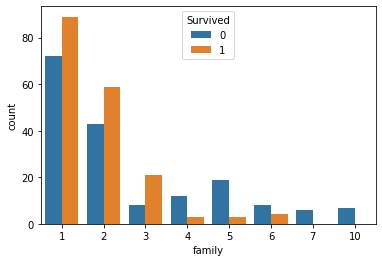

In [22]:
df2[(df['SibSp'] > 0) & (df['Parch'] > 0)]
df2['family'] = df2['SibSp'] + df2['Parch']
sns.countplot(x='family', hue='Survived', data=df2)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroupsTen,AgeGroupsTitle
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,0,unidentified,S,2,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,7,solo,C,3,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,0,unidentified,S,2,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,5,group,S,3,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,0,unidentified,S,3,adult


In [24]:
def prepare_data(data):
    
    data['sex'] = data['PassengerId']
    data['cabin'] = data['PassengerId']
    data['embarked'] = data['PassengerId']
    data['ageGroupsTitle'] = data['PassengerId']

    for i,val in enumerate(data['Sex']):
        if data['Sex'][i] == 'male':
            data['sex'][i] = 1
        else:
            data['sex'][i] = 0
    # print(data['Age'].median())
    data['Age'] = data['Age'].fillna(data['Age'].median())
    
    for i, value in enumerate(data['Cabin']):
        if value == 'unidentified':
            data['cabin'][i] = 0
        if value == 'solo':
            data['cabin'][i] = 1
        if value == 'group':
            data['cabin'][i] = 2
    
    for i, value in enumerate(data['Embarked']):
        if value == 'S':
            data['embarked'][i] = 0
        if value == 'C':
            data['embarked'][i] = 1
        if value == 'Q':
            data['embarked'][i] = 2

    for i, value in enumerate(data['AgeGroupsTen']):
        if value == 'undefined':
            data['AgeGroupsTen'][i] = 0

    for i, value in enumerate(data['AgeGroupsTitle']):
        if value == 'undefined':
            data['ageGroupsTitle'][i] = 0
        if value == 'kid':
            data['ageGroupsTitle'][i] = 1
        if value == 'adult':
            data['ageGroupsTitle'][i] = 2
        if value == 'elder':
            data['ageGroupsTitle'][i] = 3
     
    data['Fare'].fillna(data['Fare'].median()/10)

    data = data.drop(['Sex', 'Cabin', 'Embarked', 'AgeGroupsTitle'], axis=1)

    return data


In [25]:
df_train_X = df
df_train_y = df['Survived']
df_train_X = df_train_X.drop(['Survived', 'Name'], axis=1)

# df_train_X
df_train_x = prepare_data(df_train_X)



In [26]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

clf_splitted = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [27]:
x_train,x_test,y_train, y_test = train_test_split(df_train_x,df_train_y, test_size=0.25)

In [28]:
clf_splitted.fit(x_train, y_train)
prediction = clf_splitted.predict(x_test)
(prediction == y_test).sum()/len(prediction)

0.7937219730941704

In [29]:
clf.fit(df_train_x, df_train_y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='auto',
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [30]:
df_test_x = prepare_data(test)
df_test_x = df_test_x.drop('Name', axis=1)
df_test_x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,AgeGroupsTen,sex,cabin,embarked,ageGroupsTitle
0,892,3,34.5,0,0,0,3,1,0,2,2
1,893,3,47.0,1,0,0,4,0,0,0,2
2,894,2,62.0,0,0,0,6,1,0,2,3
3,895,3,27.0,0,0,0,2,1,0,0,2
4,896,3,22.0,1,1,1,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,0,0,1,0,0,0
414,1306,1,39.0,0,0,10,3,0,1,1,2
415,1307,3,38.5,0,0,0,3,1,0,0,2
416,1308,3,27.0,0,0,0,0,1,0,0,0


In [31]:
prediction_submit = clf.predict(df_test_x)
prediction_submit

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [32]:
prediction = pd.DataFrame()
prediction['PassengerId'] = df_test_x['PassengerId']
prediction['Survived'] = prediction_submit


In [33]:
import datetime
datetime.datetime.now()
timestamp = f'predictions/prediction-{str(datetime.datetime.now())}.csv'
prediction.to_csv(timestamp, encoding='utf-8', index=False)